In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
drug=pd.read_csv('/content/drug200.csv')

In [ ]:
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
print(drug['Cholesterol'].value_counts())

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


In [ ]:
print(drug['Drug'].value_counts())

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [ ]:
le=LabelEncoder()
drug["Sex"] = LabelEncoder().fit_transform(drug["Sex"])
drug["BP"] = LabelEncoder().fit_transform(drug["BP"])
drug["Cholesterol"] = LabelEncoder().fit_transform(drug["Cholesterol"])
drug["Drug"] = LabelEncoder().fit_transform(drug["Drug"])
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


Female-->0 Male-->1   | cholestrol high-->0 normal-->1
BP low-->1  high-->0 normal-->2  | drugtype
    |


In [ ]:
num_col=drug.select_dtypes(exclude=['object'])

<Axes: >

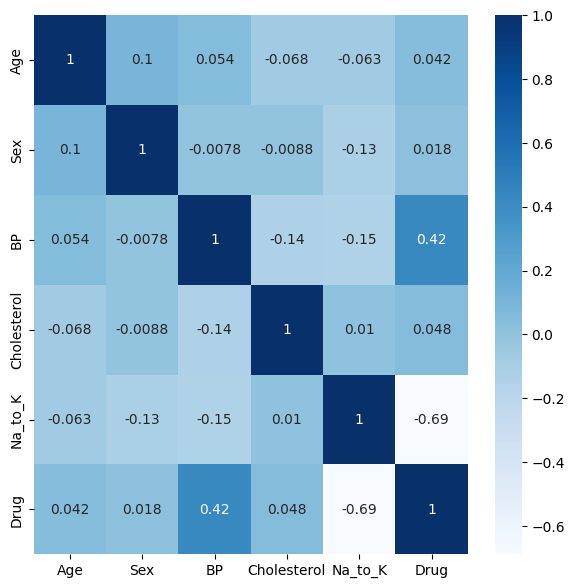

In [ ]:
correlation=num_col.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='Blues')

In [ ]:
x=drug.drop('Drug',axis=1)

In [ ]:
y=drug['Drug']

In [ ]:
y

,Drug
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [ ]:
std=StandardScaler()
x=std.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [72]:
x_test.shape

(20, 5)

In [ ]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(5,)),
                        keras.layers.Dense(60,activation='relu'),
                        keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dense(5,activation='softmax')])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
dnn=model.fit(x_train,y_train,epochs=50,validation_split=0.1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.1008 - loss: 1.6550 - val_accuracy: 0.1875 - val_loss: 1.5994
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2289 - loss: 1.5599 - val_accuracy: 0.1875 - val_loss: 1.5420
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4482 - loss: 1.4798 - val_accuracy: 0.1875 - val_loss: 1.4935
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5466 - loss: 1.4076 - val_accuracy: 0.3750 - val_loss: 1.4519
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6427 - loss: 1.3396 - val_accuracy: 0.4375 - val_loss: 1.4151
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6581 - loss: 1.2733 - val_accuracy: 0.4375 - val_loss: 1.3811
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6476 - loss: 1.2070 - val_accuracy: 0.5000 - val_loss: 1.3501
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6837 - loss: 1.1418 - val_accuracy: 0.5000 - val_loss: 1.3199
Epoch 9/50
5

In [ ]:
loss,accu=model.evaluate(x_test,y_test)
print(accu)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.1865 
1.0


In [ ]:
tc=(23,'M','LOW','HIGH',7.298)
tc=le.fit_transform(tc)
tc=np.array(tc).reshape(1,-1)
ans=model.predict(tc)
print(ans)
ans=np.argmax(ans)
print(ans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[9.9961215e-01 9.0745598e-06 5.5468314e-07 4.8015704e-06 3.7351120e-04]]
0
